
Download all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

Download spacy polish language model

In [ ]:
!python -m spacy download pl_core_news_sm

2022-08-19 16:06:24.609093: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 61.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


Define function that will generate word cloud

In [ ]:

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

Load polish language model

In [ ]:
nlp = spacy.load("pl_core_news_sm")
STOP_WORDS = spacy.lang.pl.STOP_WORDS

Load dataset and make basic checks on counts

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Licencjat/DF_rich.xlsx")

In [ ]:
df = df.sort_values("ESE", ascending= False)

In [ ]:
df["ESE"].value_counts()

0.0    1108
1.0     504
Name: ESE, dtype: int64

In [ ]:
df

,author,raw,ADU,type,target,ESE,Polarity,ASD-person,NO-person
0,Robert Biedroń,nie zajmują się zdobywaniem funduszy dla Polski,PiS i PO nie zajmują się zdobywaniem funduszy...,attack,Małgorzata Kidawa-Błońska,1.0,0.0,PiS i PO nie zajmują się zdobywaniem funduszy...,PiS i PO nie zajmują się zdobywaniem funduszy...
332,Mirosław Piotrowski,"Panie prezydencie, pan przez 5 lat nie przyjec...","panie prezydencie, pan przez 5 lat nie przyjec...",attack,Andrzej Duda,1.0,0.0,"panie prezydencie, pan przez 5 lat nie przyjec...","panie prezydencie, pan przez 5 lat nie przyjec..."
345,Szymon Hołownia,"Będę intensywnie pracował nad tym, żeby w amba...",Szymon Hołownia jako prezydent będzie intensyw...,support,Szymon Hołownia,1.0,0.0,"ASD jako będzie intensywnie pracował nad tym,...","jako będzie intensywnie pracował nad tym, że..."
344,Paweł Tanajno,którzy teraz są poddani eksterminacji rządu PiS,polscy przedsiębiorcy teraz są poddani eksterm...,attack,Andrzej Duda,1.0,-1.0,polscy przedsiębiorcy teraz są poddani eksterm...,polscy przedsiębiorcy teraz są poddani eksterm...
343,Szymon Hołownia,"Zapowiedziałem wczoraj, że w ramach rozdziału ...","Szymon Hołownia zapowiedział wczoraj, że w ram...",support,Szymon Hołownia,1.0,0.0,"ASD zapowiedział wczoraj, że w ramach rozdział...","zapowiedział wczoraj, że w ramach rozdziału K..."
...,...,...,...,...,...,...,...,...,...
518,Władysław Kosiniak-Kamysz,stanęliśmy przed bardzo poważnym kryzysem,stanęliśmy przed bardzo poważnym kryzysem,NaN,NaN,NaN,0.0,stanęliśmy przed bardzo poważnym kryzysem,stanęliśmy przed bardzo poważnym kryzysem
522,Małgorzata Kidawa-Błońska,niestety nasz rząd w czasach koniunktury nie p...,niestety rząd Andrzeja Dudy w czasach koniunkt...,NaN,NaN,NaN,0.0,niestety rząd Andrzeja Dudy w czasach koniunkt...,niestety rząd Andrzeja Dudy w czasach koniunkt...
790,Mirosław Piotrowski,"Jeśli zostanę prezydentem, to natychmiast bym ...",jeśli Mirosław Piotrowski zostanie prezydentem...,NaN,NaN,NaN,0.0,jeśli Mirosław Piotrowski zostanie prezydentem...,jeśli Mirosław Piotrowski zostanie prezydentem...
815,Mirosław Piotrowski,co pięćdziesiąty czołg nie jest w stanie wyjec...,co pięćdziesiąty czołg nie jest w stanie wyjec...,NaN,NaN,NaN,0.0,co pięćdziesiąty czołg nie jest w stanie wyjec...,co pięćdziesiąty czołg nie jest w stanie wyjec...


# **ESE -**

Delete any missing value rows if they exist

In [ ]:
X = df[df["type"] =="attack"  ]["NO-person"].dropna()

In [ ]:
X[X.isna()]

Series([], Name: NO-person, dtype: object)

Lemmatize sentences in data frame

In [ ]:
X_LEM =X[:].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Count occurences of tokens

In [ ]:
 #Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(X_LEM)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#df_dtm.index=df_grouped.index


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_dtm.shape

(200, 793)

Check the most often values in table view

In [ ]:
s=df_dtm.sum().sort_values(ascending=False)
s.head(10)

rząd          38
polski        32
pis           18
europejski    17
być           17
traktat       15
polska        15
andrzej       14
prawo         14
unia          13
dtype: int64

Generate word cloud for ethotetic attack statements

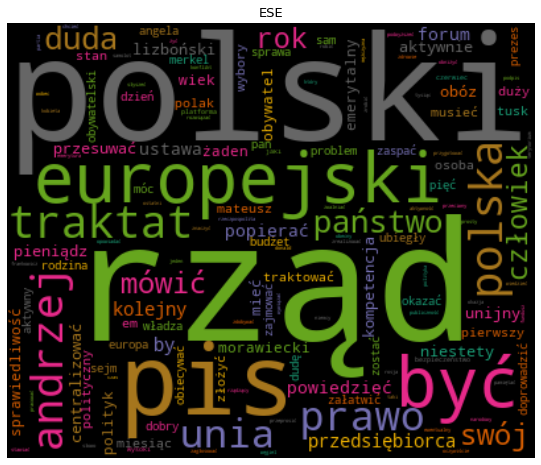

In [ ]:
generate_wordcloud(s,"ESE")

# **ESE +**

Perform same steps as for ESE- statements

In [ ]:
X = df[df["type"] =="support"  ]["NO-person"].dropna()

In [ ]:
X[X.isna()]

Series([], Name: NO-person, dtype: object)

In [ ]:
X_LEM =X[:].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(X_LEM)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())

In [ ]:
s=df_dtm.sum().sort_values(ascending=False)
s.head(10)

polska            32
polski            30
być               28
by                23
ustawa            22
człowiek          18
polak             17
przedsiębiorca    16
rok               16
europejski        16
dtype: int64

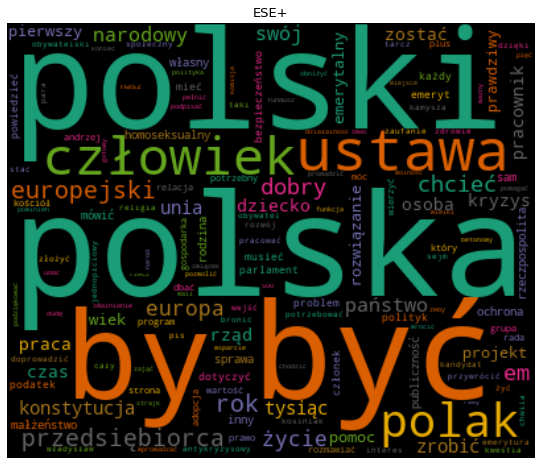

In [ ]:
generate_wordcloud(s,"ESE+")